# Importing Libaray

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
+nltk.download('punkt')
SENT_DETECTOR = nltk.data.load('tokenizers/punkt/english.pickle')
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /Users/meetshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading Data

In [2]:
data = pd.read_csv('new_data.csv')

In [3]:
pd.options.display.max_colwidth = 500

# EDA

In [4]:
data['Lyrics'].head(3)

0                                                                                                       you are the sun and moon and stars are you and i could never run away from you  you try at working out chaotic things and why should i believe myself not you  it's like the world is gonna end so soon and why should i believe myself my–  you me and everything caught in the fire i can see me drowning caught in the fire you me and everything caught in the fire i can see me drowning caught in the fire
1    when you were here before couldn't look you in the eye you're just like an angel your skin makes me cry you float like a feather in a beautiful world  i wish i was special you're so fuckin' special  but i'm a creep i'm a weirdo what the hell am i doing here i don't belong here  i don't care if it hurts i wanna have control i want a perfect body i want a perfect soul i want you to notice when i'm not around  you're so fuckin' special i wish i was special  but i'm a creep i'm a weirdo wh

In [5]:
#Printing the size of dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (104, 3)


In [6]:
data.dtypes

Track Name    object
Album Name    object
Lyrics        object
dtype: object

# Adding Columns that show number of words and charachter for each song

In [7]:
data['Lyrics'] = data['Lyrics'].astype(str)
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"] = data["Lyrics"].apply(lambda x: len(word_tokenize(x)))
data

,Track Name,Album Name,Lyrics,No_of_Characters,No_of_Words
0,You by Radiohead,Pablo Honey by Radiohead,you are the sun and moon and stars are you and i could never run away from you you try at working out chaotic things and why should i believe myself not you it's like the world is gonna end so soon and why should i believe myself my– you me and everything caught in the fire i can see me drowning caught in the fire you me and everything caught in the fire i can see me drowning caught in the fire,400,85
1,Creep by Radiohead,Pablo Honey by Radiohead,when you were here before couldn't look you in the eye you're just like an angel your skin makes me cry you float like a feather in a beautiful world i wish i was special you're so fuckin' special but i'm a creep i'm a weirdo what the hell am i doing here i don't belong here i don't care if it hurts i wanna have control i want a perfect body i want a perfect soul i want you to notice when i'm not around you're so fuckin' special i wish i was special but i'm a creep i'm a weirdo what the...,809,190
2,How Do You? by Radiohead,Pablo Honey by Radiohead,he's bitter and twisted he knows what he wants he wants to be loved and he wants to belong he wants us to listen he wants us to weep and he was a stupid baby who turned into a powerful freak but how do you how do you how do you he lives with his mother but we show him respect he's a dangerous bigot but we always forget and he's just like his daddy 'cause he cheats on his friends and he steals and he bullies anyway that he can but how do you how do you how do you,469,104
3,Stop Whispering by Radiohead,Pablo Honey by Radiohead,and the wise man said i don't want to hear your voice and the thin man said i don't want to hear your voice and they're cursing me and they won't let me be and there's nothing to say and there's nothing to do stop whispering start shouting stop whispering start shouting and the mother say we spit on your son some more and the buildings say we spit on your face some more and the feeling is that there's something wrong 'cause i can't find the words and i can't find the songs stop whispering...,750,149
4,Thinking About You by Radiohead,Pablo Honey by Radiohead,been thinking about you your records are here your eyes are on my wall your teeth are over there but i'm still no one and you're now a star what do you care been thinking about you and there's no rest shit i still love you still see you in bed but i'm playing with myself and what do you care when the other men are far far better all the things you've got all the things you need who bought you cigarettes who bribed the company to come and see you honey i've been thinking about you so how c...,937,204
...,...,...,...,...,...
99,Present Tense by Radiohead,A Moon Shaped Pool by Radiohead,this dance this dance is like a weapon is like a weapon of self-defence of self-defence against the present against the present the present tense no i won't get heavy don't get heavy keep it light and keep it moving i am doing no harm as my world comes crashing down i'll be dancing freaking out deaf dumb and blind in you i'm lost in you i'm lost i won't turn around or the penny drops won't stop now won't slack off or all this love will be in vain to stop from falling down a mine it's no on...,619,141
100,Tinker Tailor Soldier Sailor Rich Man Poor Man Beggar Man Thief by Radiohead,A Moon Shaped Pool by Radiohead,"all the holes at once are comin' alive set free out of sight and out of mind the lonely and their prey the ones you light your fires to keep away is crawling out upon its belly and all you have to do is say ""yes"" all the birds stay up in the trees all the fish swim down to the deep the lonely and their prey i am here come to me before it's too late the one you light your fires to keep away is crawling out upon its belly and all you have to do is say ""yes""",463,107
101,True Love Waits by Radiohead,A Moon Shaped Pool by Radiohead,i'll drown my beliefs to have your babies i'll 

In [8]:
data[data['No_of_Words']==1]


,Track Name,Album Name,Lyrics,No_of_Characters,No_of_Words
40,Treefingers by Radiohead,Kid A by Radiohead,nan,3,1
46,Untitled by Radiohead,Kid A by Radiohead,nan,3,1
47,Treefingers (Extended Version) by Radiohead,Kid A by Radiohead,nan,3,1
56,Hunting Bears by Radiohead,Amnesiac by Radiohead,nan,3,1


In [9]:
data.shape

(104, 5)

## As we can see there are 4 songs without lyrics.They are null values in our case. We will remove them

In [10]:
data = data[data['No_of_Words']!=1]
data.shape

(100, 5)

## Check for null values

In [11]:
data.isna().sum()

Track Name          0
Album Name          0
Lyrics              0
No_of_Characters    0
No_of_Words         0
dtype: int64

# Plots to visualize the data

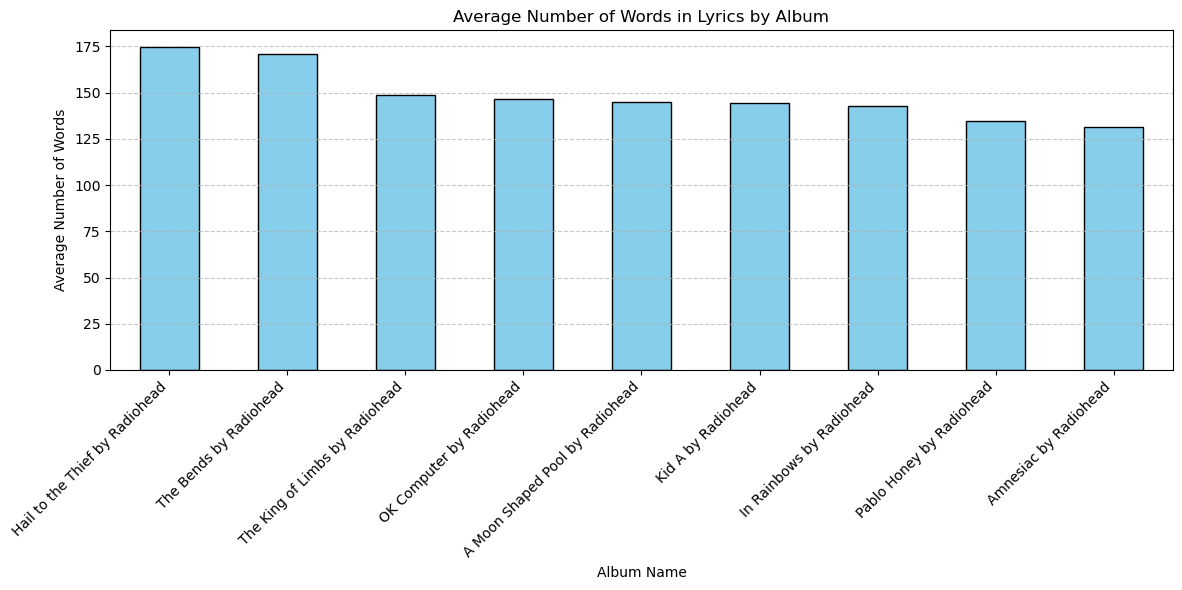

In [12]:
# Calculate the average number of words per album
average_words_by_album = data.groupby('Album Name')['No_of_Words'].mean().sort_values(ascending=False)

# Plot the distribution of words by albums
plt.figure(figsize=(12, 6))
average_words_by_album.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Number of Words in Lyrics by Album')
plt.xlabel('Album Name')
plt.ylabel('Average Number of Words')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


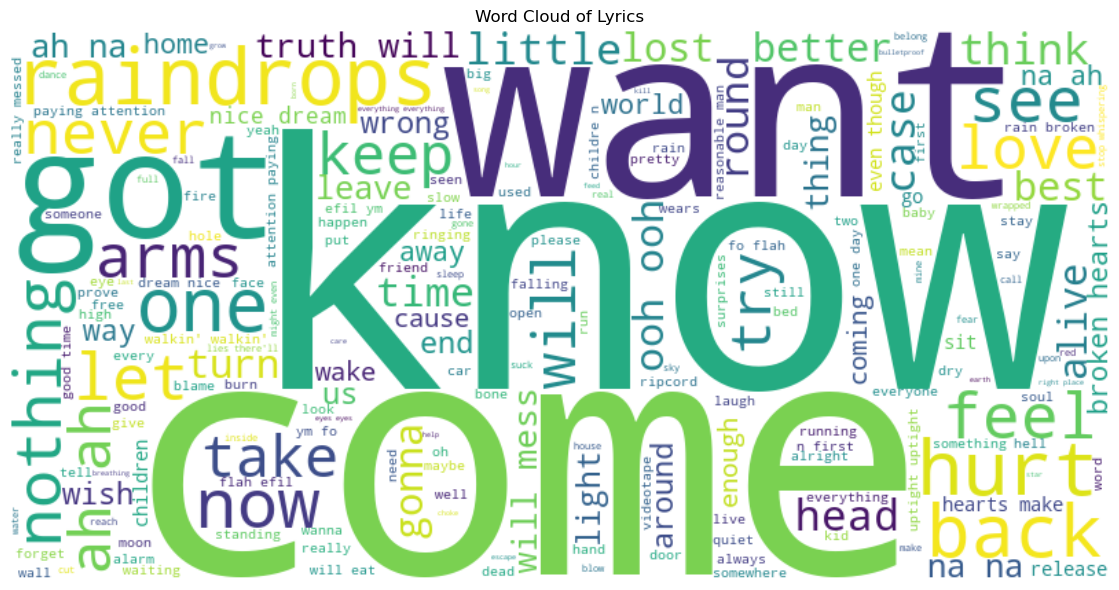

In [13]:
from wordcloud import WordCloud
all_lyrics = ' '.join(data['Lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='White').generate(all_lyrics)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Lyrics')
plt.axis('off')
plt.tight_layout()
plt.show()